In [56]:
import pandas as pd
from pySankey.sankey import sankey
import plotly.graph_objects as go
from datetime import datetime as DateTime

## Proceso

### Adquisición de datos

In [57]:
## Cargamos los datos
df = pd.read_csv('data/TB_HOSP_VAC_FALLECIDOS.csv')
df.head(5)

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fabricante_dosis2,fecha_dosis3,fabricante_dosis3,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
0,6206,LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NACIONAL DOS DE MAYO,6203,30859896,23.0,F,7/01/2021,0,...,SINOPHARM,NaN,NaN,1,NaN,0,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO
1,6216,LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,INSTITUTO NACIONAL DE SALUD DEL NIÑO,6213,29153148,3.0,M,16/11/2021,0,...,NaN,NaN,NaN,0,NaN,0,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO
2,23159,LIMA DIRIS SUR,NO PERTENECE A NINGUNA RED,HOSPITAL DE EMERGENCIAS VILLA EL SALVADOR,21646,4574996,57.0,M,10/03/2021,0,...,SINOPHARM,30/12/2021,PFIZER,1,NaN,0,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO
3,5617,LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,HOSPITAL SAN JUAN DE LURIGANCHO,5614,5390078,75.0,F,25/01/2021,0,...,PFIZER,NaN,NaN,1,NaN,0,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO
4,5946,LIMA DIRIS ESTE,NO PERTENECE A NINGUNA RED,HOSPITAL NACIONAL HIPOLITO UNANUE,5943,5579829,80.0,M,1/06/2020,0,...,PFIZER,27/11/2021,PFIZER,1,NaN,0,150132,LIMA,LIMA,SAN JUAN DE LURIGANCHO


In [58]:
df.columns

Index(['eess_renaes', 'eess_diresa', 'eess_red', 'eess_nombre', 'id_eess',
       'id_persona', 'edad', 'sexo', 'fecha_ingreso_hosp', 'flag_uci',
       'fecha_ingreso_uci', 'fecha_ingreso_ucin', 'con_oxigeno',
       'con_ventilacion', 'fecha_segumiento_hosp_ultimo',
       'evolucion_hosp_ultimo', 'flag_vacuna', 'fecha_dosis1',
       'fabricante_dosis1', 'fecha_dosis2', 'fabricante_dosis2',
       'fecha_dosis3', 'fabricante_dosis3', 'cdc_positividad',
       'cdc_fecha_fallecido_covid', 'cdc_fallecido_covid',
       'ubigeo_inei_domicilio', 'dep_domicilio', 'prov_domicilio',
       'dist_domicilio'],
      dtype='object')

### Limpieza y transformación de datos

In [59]:
## Generamos las columnas necesarias para graficar
df['UCI'] = 'NO UCI'
df.loc[df[df['flag_uci'] == 1].index,'UCI'] = 'UCI'
df['FALLECIDO'] = 'NO FALLECIDO'
df.loc[df[df['cdc_fallecido_covid'] == 1].index,'FALLECIDO'] = 'FALLECIDO'
df['DOSIS'] = 'SIN VACUNA'
df.loc[df[df['fecha_dosis1'].notna()].index,'DOSIS'] = 'DOSIS: 1'
df.loc[df[df['fecha_dosis2'].notna()].index,'DOSIS'] = 'DOSIS: 2'
df.loc[df[df['fecha_dosis3'].notna()].index,'DOSIS'] = 'DOSIS: 3'


In [60]:
df[['flag_vacuna','fecha_dosis1','fecha_dosis2','fecha_dosis3','DOSIS','flag_uci','UCI','cdc_fallecido_covid','FALLECIDO']].head(10)

,flag_vacuna,fecha_dosis1,fecha_dosis2,fecha_dosis3,DOSIS,flag_uci,UCI,cdc_fallecido_covid,FALLECIDO
0,2,6/10/2021,10/12/2021,NaN,DOSIS: 2,0,NO UCI,0,NO FALLECIDO
1,0,NaN,NaN,NaN,SIN VACUNA,0,NO UCI,0,NO FALLECIDO
2,3,11/02/2021,19/07/2021,30/12/2021,DOSIS: 3,0,NO UCI,0,NO FALLECIDO
3,2,3/05/2021,24/05/2021,NaN,DOSIS: 2,0,NO UCI,0,NO FALLECIDO
4,3,3/05/2021,25/05/2021,27/11/2021,DOSIS: 3,0,NO UCI,0,NO FALLECIDO
5,2,4/09/2021,25/09/2021,NaN,DOSIS: 2,0,NO UCI,0,NO FALLECIDO
6,3,5/07/2021,27/07/2021,24/12/2021,DOSIS: 3,1,UCI,0,NO FALLECIDO
7,3,14/06/2021,5/07/2021,18/01/2022,DOSIS: 3,0,NO UCI,0,NO FALLECIDO
8,3,2/06/2021,23/06/2021,3/12/2021,DOSIS: 3,1,UCI,0,NO FALLECIDO
9,0,NaN,NaN,NaN,SIN VACUNA,0,NO UCI,1,FALLECIDO


In [61]:
df.sort_values('DOSIS', inplace=True)

## Resultados

In [62]:
colors = {
    "SIN VACUNA": "#f71b1b",
    "DOSIS: 2": "#f3f71b",
    "DOSIS: 3": "#12e23f",
    "DOSIS: 1": "#f78c1b",
    "FALLECIDO": "#000000",
    "UCI": "#000000",
    "NO UCI": "#1b7ef7",
    "NO FALLECIDO": "#1b7ef7"
}

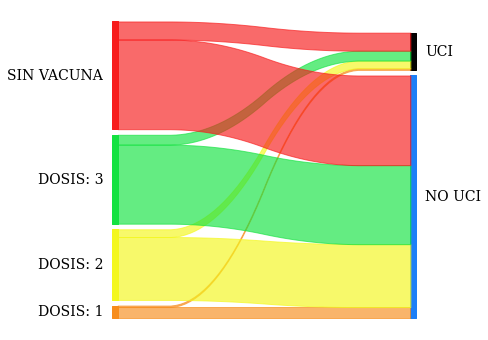

In [63]:
sankey(df["DOSIS"], df["UCI"], colorDict=colors)

In [64]:
novacunados_uci_count = len(df[(df['flag_vacuna']==0) & (df['UCI']=='UCI')])
novacunados_nouci_count = len(df[(df['flag_vacuna']==0) & (df['UCI']=='NO UCI')])

dosis1_uci_count = len(df[(df['flag_vacuna']==1) & (df['UCI']=='UCI')])
dosis1_nouci_count = len(df[(df['flag_vacuna']==1) & (df['UCI']=='NO UCI')])

dosis2_uci_count = len(df[(df['flag_vacuna']==2) & (df['UCI']=='UCI')])
dosis2_nouci_count = len(df[(df['flag_vacuna']==2) & (df['UCI']=='NO UCI')])

dosis3_uci_count = len(df[(df['flag_vacuna']==3) & (df['UCI']=='UCI')])
dosis3_nouci_count = len(df[(df['flag_vacuna']==3) & (df['UCI']=='NO UCI')])

vacunados_uci_count = len(df[(df['flag_vacuna']>0) & (df['UCI']=='UCI')])
vacunados_nouci_count = len(df[(df['flag_vacuna']>0) & (df['UCI']=='NO UCI')])


print(f'novacunados_uci_count: {novacunados_uci_count}')
print(f'novacunados_nouci_count: {novacunados_nouci_count}')

print(f'dosis1_uci_count: {dosis1_uci_count}')
print(f'dosis1_nouci_count: {dosis1_nouci_count}')

print(f'dosis2_uci_count: {dosis2_uci_count}')
print(f'dosis2_nouci_count: {dosis2_nouci_count}')

print(f'dosis3_uci_count: {dosis3_uci_count}')
print(f'dosis3_nouci_count: {dosis3_nouci_count}')

print(f'vacunados_uci_count: {vacunados_uci_count}')
print(f'vacunados_nouci_count: {vacunados_nouci_count}')

novacunados_uci_count: 8910
novacunados_nouci_count: 44257
dosis1_uci_count: 774
dosis1_nouci_count: 5482
dosis2_uci_count: 3800
dosis2_nouci_count: 30842
dosis3_uci_count: 4824
dosis3_nouci_count: 38633
vacunados_uci_count: 9398
vacunados_nouci_count: 74957


In [70]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  ['SIN VACUNA','DOSIS: 1','DOSIS: 2','DOSIS: 3','UCI','NO UCI'],
      color = ['#f71b1b','#f78c1b','#f3f71b','#12e23f','#000000','#1b7ef7']
    ),
    link = dict(
      source = [0, 1, 2, 3, 0, 1, 2, 3],
      target = [4, 4, 4, 4, 5, 5, 5, 5],
      value = [8910, 774, 3800, 4824, 44257, 5482, 30842, 38633],
      color = ['lightcoral','peachpuff','lemonchiffon','lightgreen','lightcoral','peachpuff','lemonchiffon','lightgreen']
  ))])

fig.update_layout(title_text="FLUJO DE PACIENTES QUE LLEGAN A UCI SEGÚN ESTADO DE VACUNACIÓN",
                  width=1024,
                  height=768,
                  font_size=14)

fig.add_annotation(go.layout.Annotation(
            showarrow=False,
            text="""Fuente: https://www.datosabiertos.gob.pe/dataset/hospitalizados-vacunados-y-fallecidos-por-covid-19<br>
            Autor: https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}',
            xanchor='right',
            x=1,
            yanchor='top',
            y=0,
            align='right'
        ))

fig.show()

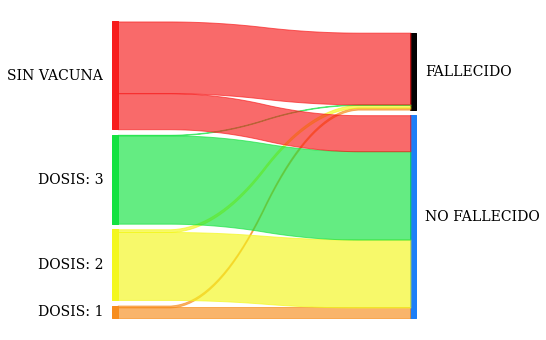

In [66]:
sankey(df["DOSIS"], df["FALLECIDO"], colorDict=colors)

In [67]:
novacunados_fallecido_count = len(df[(df['flag_vacuna']==0) & (df['FALLECIDO']=='FALLECIDO')])
novacunados_nofallecido_count = len(df[(df['flag_vacuna']==0) & (df['FALLECIDO']=='NO FALLECIDO')])

dosis1_fallecido_count = len(df[(df['flag_vacuna']==1) & (df['FALLECIDO']=='FALLECIDO')])
dosis1_nofallecido_count = len(df[(df['flag_vacuna']==1) & (df['FALLECIDO']=='NO FALLECIDO')])

dosis2_fallecido_count = len(df[(df['flag_vacuna']==2) & (df['FALLECIDO']=='FALLECIDO')])
dosis2_nofallecido_count = len(df[(df['flag_vacuna']==2) & (df['FALLECIDO']=='NO FALLECIDO')])

dosis3_fallecido_count = len(df[(df['flag_vacuna']==3) & (df['FALLECIDO']=='FALLECIDO')])
dosis3_nofallecido_count = len(df[(df['flag_vacuna']==3) & (df['FALLECIDO']=='NO FALLECIDO')])

vacunados_fallecido_count = len(df[(df['flag_vacuna']>0) & (df['FALLECIDO']=='FALLECIDO')])
vacunados_nofallecido_count = len(df[(df['flag_vacuna']>0) & (df['FALLECIDO']=='NO FALLECIDO')])


print(f'novacunados_fallecido_count: {novacunados_fallecido_count}')
print(f'novacunados_nofallecido_count: {novacunados_nofallecido_count}')

print(f'dosis1_fallecido_count: {dosis1_fallecido_count}')
print(f'dosis1_nofallecido_count: {dosis1_nofallecido_count}')

print(f'dosis2_fallecido_count: {dosis2_fallecido_count}')
print(f'dosis2_nofallecido_count: {dosis2_nofallecido_count}')

print(f'dosis3_fallecido_count: {dosis3_fallecido_count}')
print(f'dosis3_nofallecido_count: {dosis3_nofallecido_count}')

print(f'vacunados_fallecido_count: {vacunados_fallecido_count}')
print(f'vacunados_nofallecido_count: {vacunados_nofallecido_count}')

novacunados_fallecido_count: 35254
novacunados_nofallecido_count: 17913
dosis1_fallecido_count: 959
dosis1_nofallecido_count: 5297
dosis2_fallecido_count: 1347
dosis2_nofallecido_count: 33295
dosis3_fallecido_count: 261
dosis3_nofallecido_count: 43196
vacunados_fallecido_count: 2567
vacunados_nofallecido_count: 81788


In [68]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  ['SIN VACUNA','DOSIS: 1','DOSIS: 2','DOSIS: 3','FALLECIDO','NO FALLECIDO'],
      color = ['#f71b1b','#f78c1b','#f3f71b','#12e23f','#000000','#1b7ef7']
    ),
    link = dict(
      source = [0, 1, 2, 3, 0, 1, 2, 3],
      target = [4, 4, 4, 4, 5, 5, 5, 5],
      value = [35254, 959, 1347, 261, 17913, 5297, 33295, 43196],
      color = ['lightcoral','peachpuff','lemonchiffon','lightgreen','lightcoral','peachpuff','lemonchiffon','lightgreen']
  ))])

fig.update_layout(title_text="FLUJO DE PACIENTES QUE FALLECEN SEGÚN ESTADO DE VACUNACIÓN",
                  width=1024,
                  height=768,
                  font_size=14)

fig.add_annotation(go.layout.Annotation(
            showarrow=False,
            text="""Fuente: https://www.datosabiertos.gob.pe/dataset/hospitalizados-vacunados-y-fallecidos-por-covid-19<br>
            Autor: https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}',
            xanchor='right',
            x=1,
            yanchor='top',
            y=0,
            align='right'
        ))

fig.show()

In [69]:
ratio = novacunados_fallecido_count / vacunados_fallecido_count
print(ratio)

13.733541098558629
